<a href="https://colab.research.google.com/github/rlevy820/scotus-research/blob/main/SCOTUSVariableAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rlevy820/scotus-research/refs/heads/main/data/Case%20Centered%20Data.csv')

In [4]:
total_values = df.notna().sum()
missing_values = df.isna().sum()
percentage_missing = (missing_values / len(df)) * 100

summary_df = pd.DataFrame({
    'Non-Missing Values': total_values,
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})
summary_df

,Non-Missing Values,Missing Values,Percentage Missing
caseId,13780,0,0.000000
docketId,13780,0,0.000000
caseIssuesId,13780,0,0.000000
voteId,13780,0,0.000000
dateDecision,13780,0,0.000000
decisionType,13780,0,0.000000
usCite,13283,497,3.606676
sctCite,13776,4,0.029028
ledCite,13774,6,0.043541
lexisCite,13780,0,0.000000


In [5]:
# keep partyWinning to 0 and 1, deny or affirm
df_clean = df[df['partyWinning'] != 2]

# drop columns that have over threshold percentage of N/A values
threshold = 50
df_clean = df_clean.dropna(thresh=len(df) * (1 - threshold / 100), axis=1)

# drop columns that were coded after the decition was made
columns_to_drop = ['dateDecision', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'lcDisagreement', 'declarationUncon', 'caseDisposition', 'caseDispositionUnusual', 'precedentAlteration', 'voteUnclear', 'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1', 'majOpinWriter', 'majOpinAssigner', 'splitVote', 'majVotes', 'minVotes']
df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')

# drop duplicate id variables
columns_to_drop = ['caseId', 'docketId', 'caseIssuesId']
df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')

df_clean = df_clean.dropna()
df_clean

,voteId,decisionType,term,naturalCourt,chief,docket,caseName,dateArgument,petitioner,respondent,...,caseOrigin,caseSource,certReason,lcDisposition,lcDispositionDirection,partyWinning,issue,issueArea,lawType,lawSupp
0,1946-001-01-01-01,1,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,198.0,172.0,...,51.0,29.0,11.0,2.0,1.0,1.0,80180.0,8.0,6.0,600.0
1,1946-002-01-01-01,1,1946,1301,Vinson,12,CLEVELAND v. UNITED STATES,10/10/1945,100.0,27.0,...,123.0,30.0,4.0,2.0,1.0,0.0,10500.0,1.0,6.0,600.0
2,1946-002-02-01-01,1,1946,1301,Vinson,17,CLEVELAND v. UNITED STATES,10/10/1945,100.0,27.0,...,123.0,30.0,4.0,2.0,1.0,0.0,10500.0,1.0,6.0,600.0
3,1946-002-03-01-01,1,1946,1301,Vinson,14,CLEVELAND v. UNITED STATES,10/10/1945,100.0,27.0,...,123.0,30.0,4.0,2.0,1.0,0.0,10500.0,1.0,6.0,600.0
4,1946-002-04-01-01,1,1946,1301,Vinson,19,CLEVELAND v. UNITED STATES,10/10/1945,100.0,27.0,...,123.0,30.0,4.0,2.0,1.0,0.0,10500.0,1.0,6.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13773,2022-056-01-01-01,1,2022,1710,Roberts,22-227,LAC DU FLAMBEAU BAND OF LAKE SUPERIOR CHIPPEWA...,4/24/2023,170.0,114.0,...,20.0,21.0,2.0,3.0,2.0,0.0,80030.0,8.0,3.0,307.0
13774,2022-057-01-01-01,1,2022,1710,Roberts,22-210,DUPREE v. YOUNGER,4/24/2023,19.0,110.0,...,79.0,24.0,2.0,9.0,2.0,1.0,90110.0,9.0,4.0,400.0
13775,2022-058-01-01-01,1,2022,1710,Roberts,22-381,YEGIAZARYAN v. SMAGIN,4/25/2023,137.0,193.0,...,48.0,29.0,2.0,3.0,2.0,0.0,80070.0,8.0,3.0,362.0
13776,2022-058-02-01-01,1,2022,1710,Roberts,22ñ383,"CMB MONACO, FKA COMPAGNIE MONEGASQUE DE BANQUE...",4/25/2023,113.0,193.0,...,48.0,29.0,2.0,3.0,2.0,0.0,80070.0,8.0,3.0,362.0


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text

In [9]:
inputs = df_clean.drop('partyWinning', axis=1)
target = df_clean['partyWinning']

In [11]:
for column in inputs.columns:
  if inputs[column].dtype == object:
    le = LabelEncoder()
    inputs[column] = le.fit_transform(inputs[column])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [13]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
model.score(X_test, y_test)

0.7043478260869566

In [15]:
# understand how the first few levels of the tree is working
tree_rules = export_text(model, feature_names=list(inputs.columns))
print(tree_rules[:500])  # Print the first 500 characters of the tree rules


|--- respondent <= 328.50
|   |--- respondent <= 64.00
|   |   |--- voteId <= 1933.00
|   |   |   |--- docket <= 4810.50
|   |   |   |   |--- caseSource <= 28.50
|   |   |   |   |   |--- caseOrigin <= 16.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- caseOrigin >  16.00
|   |   |   |   |   |   |--- dateArgument <= 279.50
|   |   |   |   |   |   |   |--- issue <= 10380.00
|   |   |   |   |   |   |   |   |--- caseName <= 1421.50
|   |   |   |   |   |   |   |   |   |--- class: 


Dimention Reduction

In [29]:
# dimention reduction
import prince

mca = prince.MCA(
    n_components=21,
    random_state=42
)

mca = mca.fit(df_clean)

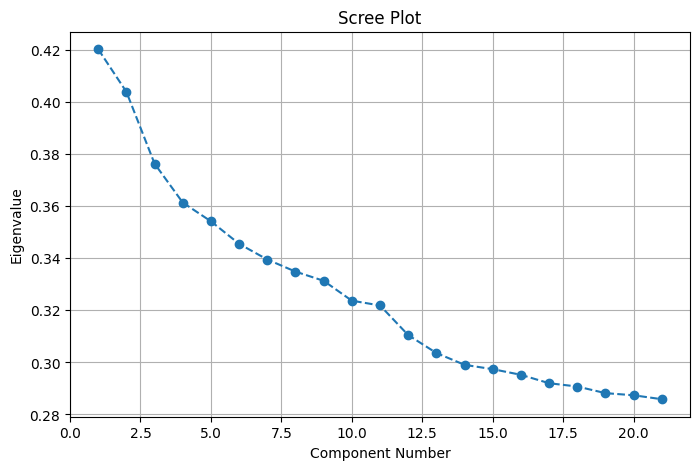

In [30]:
eigenvalues = mca.eigenvalues_

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

ADA BOOST TREE

In [33]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [34]:
ada_model.score(X_test, y_test)

0.6572890025575447

See how model performs with just petitioner as an input

In [ ]:
# Select only the 'petitioner' column as input
inputs_petitioner = df_clean[['petitioner']]

# Encode the 'petitioner' column if it's categorical
if inputs_petitioner['petitioner'].dtype == object:
  le = LabelEncoder()
  inputs_petitioner['petitioner'] = le.fit_transform(inputs_petitioner['petitioner'])

# Split the data into training and testing sets
X_train_petitioner, X_test_petitioner, y_train_petitioner, y_test_petitioner = train_test_split(
    inputs_petitioner, target, test_size=0.2
)

# Create and train a new decision tree model
model_petitioner = tree.DecisionTreeClassifier()
model_petitioner.fit(X_train_petitioner, y_train_petitioner)

# Evaluate the model's performance
score_petitioner = model_petitioner.score(X_test_petitioner, y_test_petitioner)

print(f"Model score with only 'petitioner' as input: {score_petitioner}")


Model score with only 'petitioner' as input: 0.5948849104859335
